In [1]:
# K-means clustering
# K-nearest neighbor
# PCA
# linear regression
# logistic regression
# SVM
# decision tree
# Sampling
## stratified sampling
## uniform sampling
## reservoir sampling
## sampling multinomial distribution
## random generator
# NLP algorithms (if that's your area of work)
## bigrams
## tf-idf

In [1]:
# K-means clustering
import numpy as np
def kMeansClustering(X, K):
    Cx = np.random.random_sample(K)*(np.amax(X)- np.amin(X)) + np.amin(X)
    Cy = np.random.random_sample(K)*(np.amax(X)- np.amin(X)) + np.amin(X)
    C = np.array(list(zip(Cx, Cy)), dtype=np.float32) # numpy array is faster than python list
    print(np.shape(C))

    for i in range(100): # max 100 iterations
        m = len(X)
        idx = np.zeros(m)
        for i in range(m):
            dist = np.linalg.norm(X[i] - C, axis = 1)
            idx[i] = np.argmin(dist)

        # update the position of the K centroids
        for i in range(K):
            points = [X[j] for j in range(m) if idx[j] == i]
            C[i] = np.mean(points, axis = 0)
    return C

arrays = [[12, 39], [20, 36], [28, 30], [18, 52], [29, 54], [33, 46], [24, 55],
[45, 59], [45, 63], [52, 70], [51, 66], [52, 63], [55, 58], [53, 23], [55, 14],
[61, 8], [64, 19], [69, 7], [72, 24]]
C = kMeansClustering(arrays,3)

(3, 2)


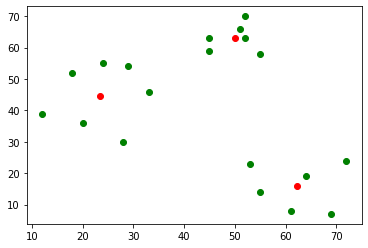

In [2]:
import matplotlib.pyplot as plt
x = [x[0] for x in arrays]
y = [x[1] for x in arrays]
Cx = [x[0] for x in C]
Cy = [x[1] for x in C]
plt.scatter(x, y, color='g')
plt.scatter(Cx, Cy, color='r')

C:\Users\zqian\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

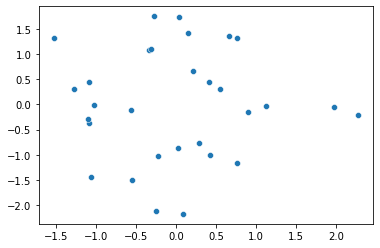

In [30]:
# PCA
## Scale the data — we don’t want some feature to be voted as “more important” due to scale differences.
## Calculate covariance matrix — square matrix giving the covariances between each pair of elements of a random vector
## Eigendecomposition
import seaborn as sns
from sklearn.preprocessing import StandardScaler
Cx = np.random.random_sample(30)*4 + 10
Cy = np.random.random_sample(30)*40 + 10
Cz = np.random.random_sample(30)*100 + 10
X = np.array(list(zip(Cx, Cy, Cz)), dtype=np.float32) # numpy array is faster than python list
    
X_scaled = StandardScaler().fit_transform(X) #30x3
features = X_scaled.T # 3x30
cov_matrix = np.cov(features) # 3x3
values, vectors = np.linalg.eig(cov_matrix) # eigen decomposition, results ordered by variance of vectors(3x3)

explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i]/np.sum(values))

PC1 = np.dot(X_scaled, vectors.T[0]) # 30x3, 3x1  ---> 30x1
PC2 = np.dot(X_scaled, vectors.T[1])
sns.scatterplot(PC1, PC2)

In [28]:
np.shape(PC1)

(30,)

In [25]:
vectors.T[0]

array([-0.46027938,  0.60291617,  0.65164023])

In [40]:
# linear regression
# least square coefficient estimate

class LinearRegression:
    def __init__(self):
        self.m = 0
        self.b = 0
    def fit(self, X, y):
        self.m = sum((X-np.mean(X))*(y-np.mean(y)))/sum((X-np.mean(X))**2)
        self.b = np.mean(y) - self.m*np.mean(X)
    def predict(self, X): 
        return self.m*X + self.b
    def coef(self, y, y_hat):
        return 1 - sum((y-y_hat)**2)/sum((y-np.mean(y))**2)

In [41]:
X = np.linspace(0,10,10)
m, b  = 3, -2
Y = m * X + b + 0.1 * np.random.randn(X.shape[0])

lr = LinearRegression()
lr.fit(X,Y)
Y_hat = lr.predict(X)
R2 = lr.coef(Y,Y_hat)

print(lr.m, lr.b)
print(R2)

2.992412056956919 -1.911093353240874
0.9999626705987037


In [71]:
# Logistic Regression

class LogisticRegression:
    
    # constructor
    def __init__(self, learning_rate, max_iteration):
        self.theta = None
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
    
    # method
    def sigmoid(self, z):
        return 1.0/(1+np.exp(-z))
    
    def cost_func(self, X, y): # both h and y are 1D array
        h = self.sigmoid(np.dot(X, self.theta))
        J = 1.0/m *np.sum(-y*np.log(h) - (1.0-y)*np.log(1.0-h))
        return J
    
    def gradients(self, X, y):
        h = self.sigmoid(np.dot(X, self.theta))
        return 1.0/m * np.dot(X.T, (h-y))
    
    def fit(self, X, y): # X is mxn dimension, m=sample size, n=feature dimension
        cost = []
        X = np.array([[1] + x for x in X]) # add x0=1 to all X
        self.theta = np.random.rand(X.shape[1]) # array with n elements
        for it in range(self.max_iteration):
            cost.append(self.cost_func(X, y))
            grads = self.gradients(X, y)
            self.theta -= self.learning_rate*grads
        print(cost)
        
    def predict_proba(self, X):
        pred = self.sigmoid(np.dot(X, self.theta))
        return pred
    
    

In [75]:
x1 = np.random.randn(5,3) + 5
x2 = np.random.randn(5,3) - 5
X = np.concatenate([x1,x2], axis=0)    
y  = np.concatenate([np.ones(5), -np.zeros(5)], axis=0)   
lr = LogisticRegression(learning_rate=0.01, max_iteration=100)
lr.fit(X,y)

[0.049035790518848515, 0.048117772958766125, 0.047233481019227794, 0.04638109384600978, 0.04555891907947929, 0.04476538173582384, 0.043999014221549865, 0.043258447348895335, 0.04254240223717429, 0.04184968299989751, 0.04117917013024033, 0.04052981450835952, 0.0399006319634831, 0.03929069833183019, 0.038699144958461974, 0.03812515459727937, 0.037567957668688395, 0.03702682883909614, 0.0365010838904334, 0.03599007685144568, 0.035493197365588314, 0.03500986827309392, 0.034539543387168456, 0.03408170544639312, 0.03363586422726836, 0.03320155480249186, 0.032778335932017996, 0.03236578857525193, 0.031963514513878265, 0.03157113507584996, 0.031188289951983826, 0.030814636097421095, 0.030449846710941537, 0.030093610285776007, 0.029745629726146236, 0.029405621524286503, 0.029073314993175337, 0.028748451550629925, 0.02843078405079887, 0.028120076159436604, 0.02781610176965015, 0.027518644455097236, 0.027227496957864573, 0.026942460708489633, 0.026663345375799168, 0.026389968444425056, 0.02612215

In [76]:
lr.predict_proba(X)

array([9.99691285e-01, 9.99766336e-01, 9.99551114e-01, 9.99710488e-01,
       9.99443771e-01, 1.03324231e-03, 5.73465980e-04, 1.23758232e-03,
       5.73662186e-03, 2.50268587e-03])

In [3]:
# SVM
# https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47


class SupportVectorMachine:
    # constructor
    def __init__(self, C, learning_rate, max_iteration):
        self.weights = None
        self.C = C
        self.learning_rate = learning_rate
        self.max_iteration = max_iteration
        
    def cost_func(self, W, X, y):
        # compute the hinge loss
        N = X.shape[0]
        distances = 1 - y*(np.dot(X, W))
        distances[distances<0] = 0 # equivalent to max(0, distance)
        hinge_loss = self.C * (np.sum(distances)/N)
        cost = 1/2*np.dot(W[1:], W[1:]) + hinge_loss
        return cost

    def gradients(self, W, X, y):
        distances = 1 - y*np.dot(X, W)
        gradients = np.zeros(len(W))
        for idx, d in enumerate(distances):
            if max(0, d) == 0:
                gradients += W
            else:
                gradients += W - self.C * y[idx] * X[idx]
        return gradients
    
    def fit(self, X, y): # X is mxn dimension, m=sample size, n=feature dimension
        cost = []
        X = np.array([[1] + x for x in X]) # add x0=1 to all X
        y = [1 if y_ == 1 else -1 for y_ in y ]
        self.weights = np.random.rand(X.shape[1]) # array with n elements
        for it in range(self.max_iteration):
            cost.append(self.cost_func(self.weights, X, y))
            grads = self.gradients(self.weights, X, y)
            self.weights -= self.learning_rate*grads
        print(cost)
        
    def predict(self, X):
        f_x = np.dot(X, self.weights)
        pred = [1 if f_x_ >= 0 else 0 for f_x_ in f_x]
        return pred

In [4]:
x1 = np.random.randn(5,3) + 5
x2 = np.random.randn(5,3) - 5
X = np.concatenate([x1,x2], axis=0)    
y  = np.concatenate([np.ones(5), -np.zeros(5)], axis=0)   
svm = SupportVectorMachine(C=1, learning_rate=0.01,max_iteration=100)
svm.fit(X,y)

[0.6881522945615793, 0.5574033585948792, 0.4514967204618522, 0.36571234357410026, 0.2962269982950212, 0.23994386861896716, 0.19435453358136343, 0.15742717220090435, 0.1275160094827325, 0.10328796768101334, 0.0836632538216208, 0.06776723559551286, 0.05489146083236541, 0.04446208327421598, 0.03601428745211495, 0.029171572836213105, 0.02362897399733261, 0.019139468937839417, 0.01550296983964993, 0.012557405570116443, 0.010769535767618032, 0.015227950252609767, 0.01233463970461391, 0.009991058160737268, 0.011801104758421874, 0.02393004457519746, 0.01938333610590994, 0.015700502245787052, 0.012717406819087512, 0.010301099523460883, 0.008343890614003315, 0.029573257311777693, 0.034359152669540004, 0.0278309136623274, 0.022543040066485196, 0.01825986245385301, 0.014790488587620937, 0.01198029575597296, 0.009704039562338097, 0.008317761755388545, 0.01455656926680602, 0.011790821106112877, 0.00955056509595143, 0.01645335980496865, 0.036328556108319275, 0.029426130447738615, 0.02383516566266828,

In [102]:
svm.predict(X)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

In [103]:
# decision tree

class DecisionTree:
    
    def TreeNode(self, data = data, feature_index = None, split_val=None, left_child=None, right_child=None, class_value=None): # a treenode is defined by its split condition
        self.data = data
        self.feature_index = feature_index # feature index
        self.split_val = split_val # only consider numerical val
        self.left_child = left_child # TreeNode
        self.right_child = right_child # TreeNode
        self.class_value = class_value # only exist for terminal node
        
    # Split a dataset based on an attribute and an attribute value
    def test_split(self, feature_index, value, dataset):
        left_child, right_child = list(), list()
        for row in dataset:
            if row[feature_index] < value:
                left.append(row)
            else:
                right.append(row)
        return left_child, right_child
 
    # Calculate the Gini index for a split dataset
    def gini_index(self, groups, classes):
        # (1-sum(p*p))*(group_size/instances)
        # count all samples at split point
        n_instances = float(sum([len(group) for group in groups]))
        # sum weighted Gini index for each group
        gini = 0.0
        for group in groups:
            size = float(len(group))
            # avoid divide by zero
            if size == 0:
                continue
            score = 0.0
            # score the group based on the score for each class
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / size
                score += p * p
            # weight the group score by its relative size
            gini += (1.0 - score) * (size / n_instances)
        return gini

    # Select the best split point for a dataset
    def split_data(self, dataset):
        # split input data, and return a node with the split information
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None
        for index in range(len(dataset[0])-1):
            for row in dataset:
                left_child, right_child = test_split(index, row[index], dataset)
                gini = self.gini_index((left_child, right_child), class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, left_child, right_child
        node = TreeNode(dataset, b_index, b_val, TreeNode(data=left_child), TreeNode(data=right_child))
        return node

    # Create a terminal node value
    def get_terminal_class_val(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

    # split a node, get its child information, and class information if it's a terminal node
    def split(self, node, max_depth, min_size, depth):
        left, right = node['left_child']['data'], node['right_child']['data']
        
        # check for a no split
        if not left or not right or depth >= max_depth:
            node['class_value'] = self.get_terminal_class_val(left + right)
            node['right_child'] = None
            node['left_child'] = None
            return
        
        # process left child
        if len(left) <= min_size:
            node['left_child']['class_value'] = self.get_terminal_class_val(left)
        else:
            node['left_child'] = self.split_data(left)
            self.split(node['left_child'], max_depth, min_size, depth+1)
        
        # process right child
        if len(right) <= min_size:
            node['right_child']['class_value'] = self.get_terminal_class_val(right)
        else:
            node['right_child'] = self.split_data(right)
            self.split(node['right_child'], max_depth, min_size, depth+1)
 
    # Build a decision tree
    def build_tree(self, train_data, max_depth, min_size):
        # build the tree and return the root of the tree
        root = split_data(train_data) 
        self.split(root, max_depth, min_size, 1)
        return root

    # Print a decision tree
    def print_tree(node, depth=0):
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
            print_tree(node['left'], depth+1)
            print_tree(node['right'], depth+1)
        else:
            print('%s[%s]' % ((depth*' ', node)))

dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
tree = build_tree(dataset, 1, 1)
print_tree(tree)


[X1 < 6.642]
 [0]
 [1]


In [111]:
# K-nearest neighbor
## So the problem becomes how we can calculate the distances between items. The solution 
## to this depends on the data set. If the values are real we usually use the Euclidean 
## distance. 
## If the values are categorical or binary, we usually use the Hamming distance.# count # of different values

# Given a new item:
#    1. Find distances between new item and all other items
#    2. Pick k shorter distances
#    3. Pick the most common class in these k distances
#    4. That class is where we will classify the new item

# Example of making predictions
from math import sqrt
import heapq
 

class KNearestNeighbor:

    
    def euclidean_distance(self, row1, row2):
        # calculate the Euclidean distance between two vectors
        # assume the last element in each row is target variable y
        distance = 0.0
        for i in range(len(row1)-1):
            distance += (row1[i] - row2[i])**2
        return sqrt(distance)
 

    def get_neighbors(self, train, test_row, num_neighbors):
        # get top K neighbors
        distances = list()
        for train_row in train:
            dist = self.euclidean_distance(test_row, train_row)
            distances.append((dist, train_row))
        heapq.heapify(distances)
        neighbors = []
        for i in range(num_neighbors):
            dist, row = heapq.heappop(distances)
            neighbors.append(row)
        return neighbors
 
    def predict_classification(self, train, test_row, num_neighbors):
        # Make a classification prediction with neighbors
        neighbors = self.get_neighbors(train, test_row, num_neighbors)
        output_values = [row[-1] for row in neighbors]
        prediction = max(set(output_values), key=output_values.count)
        
        return prediction
    
    def predict_regression(self, train, test_row, num_neighbors):
        # Make a classification prediction with neighbors
        neighbors = self.get_neighbors(train, test_row, num_neighbors)
        output_values = [row[-1] for row in neighbors]
        prediction = np.mean(output_values)
        
        return prediction
# Test distance function
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
knn = KNearestNeighbor()
prediction = knn.predict_classification(dataset, dataset[7], 3)
print('Expected %d, Got %d.' % (dataset[7][-1], prediction))


Expected 1, Got 1.


In [ ]:
# neural network

import numpy as np

class NeuralNetwork:
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        #### TODO: Set self.activation_function to your implemented sigmoid function ####
        #
        # Note: in Python, you can define a function with a lambda expression,
        # as shown below.
        self.activation_function = lambda x : (1 / (1 + np.exp(-x)))  # Replace 0 with your sigmoid calculation.
        
        ### If the lambda code above is not something you're familiar with,
        # You can uncomment out the following three lines and put your 
        # implementation there instead.
        #
        #def sigmoid(x):
        #    return 0  # Replace 0 with your sigmoid calculation here
        #self.activation_function = sigmoid
                    

    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            final_outputs, hidden_outputs = self.forward_pass_train(X)  # Implement the forward pass function below
            # Implement the backproagation function below
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
        ''' Implement forward pass here 
         
            Arguments
            ---------
            X: features batch
        '''
        #### Implement the forward pass here ####
        ### Forward pass ###
        # TODO: Hidden layer - Replace these values with your calculations.
        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs =  self.activation_function(hidden_inputs)# signals from hidden layer


        # TODO: Output layer - Replace these values with your calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' Implement backpropagation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
        '''
        #### Implement the backward pass here ####
        ### Backward pass ###

        # TODO: Output error - Replace this value with your calculations.
        error = y - final_outputs # Output layer error is the difference between desired target and actual output.
         
        # TODO: Backpropagated error terms - Replace these values with your calculations.
        output_error_term = error 

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = output_error_term.dot(self.weights_hidden_to_output.T) 
        hidden_error_term = hidden_error *  hidden_outputs * (1 - hidden_outputs)
        
        # Weight step (input to hidden)
        delta_weights_i_h +=  X[:,None] * hidden_error_term 
        # Weight step (hidden to output)
        delta_weights_h_o +=  hidden_outputs[:,None] * output_error_term
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records
        '''
        self.weights_hidden_to_output +=self.lr * delta_weights_h_o / n_records
        self.weights_input_to_hidden += self.lr * delta_weights_i_h / n_records # update input-to-hidden weights with gradient descent step

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #### Implement the forward pass here ####
        # TODO: Hidden layer - replace these values with the appropriate calculations.
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        # TODO: Output layer - Replace these values with the appropriate calculations.
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs  # signals from final output layer 
        
        return final_outputs


#########################################################
# Set your hyperparameters here
##########################################################
iterations = 4000
learning_rate = 0.45
hidden_nodes = 30
output_nodes = 1


In [112]:
# Adam optimization 

# gradient descent optimization with adam for a two-dimensional test function
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

f(x) = x*x, here x is a vector, i.e., x = (X1,X2)

# objective function
def objective(x, y):
    return x**2.0 + y**2.0
 
# derivative of objective function
def derivative(x, y):
    return asarray([x * 2.0, y * 2.0])
 
# adam optimization
def adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2, eps=1e-8):
    # generate an initial point
    x = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    
    # initialize first and second moments
    m = [0.0 for _ in range(bounds.shape[0])]
    v = [0.0 for _ in range(bounds.shape[0])]
    
    # run the gradient descent updates
    for t in range(n_iter):
        
        # calculate gradient g(t)
        g = derivative(x[0], x[1])
        
        # build a solution one variable at a time
        for i in range(x.shape[0]):
            m[i] = beta1 * m[i] + (1.0 - beta1) * g[i]
            v[i] = beta2 * v[i] + (1.0 - beta2) * g[i]**2
            mhat = m[i] / (1.0 - beta1**(t+1))
            vhat = v[i] / (1.0 - beta2**(t+1))
            x[i] = x[i] - alpha * mhat / (sqrt(vhat) + eps)
        
        # evaluate candidate point
        score = objective(x[0], x[1])
        # report progress
        print('>%d f(%s) = %.5f' % (t, x, score))
    return [x, score]
 
# seed the pseudo random number generator
seed(1)
# define range for input [[X1_min,X1_max],[X2_min, X2_max]]
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# define the total iterations
n_iter = 60
# steps size
alpha = 0.02
# factor for average gradient
beta1 = 0.8
# factor for average squared gradient
beta2 = 0.999
# perform the gradient descent search with adam
best, score = adam(objective, derivative, bounds, n_iter, alpha, beta1, beta2)
print('Done!')
print('f(%s) = %f' % (best, score))

>0 f([-0.14595599  0.42064899]) = 0.19825
>1 f([-0.12613855  0.40070573]) = 0.17648
>2 f([-0.10665938  0.3808601 ]) = 0.15643
>3 f([-0.08770234  0.3611548 ]) = 0.13812
>4 f([-0.06947941  0.34163405]) = 0.12154
>5 f([-0.05222756  0.32234308]) = 0.10663
>6 f([-0.03620086  0.30332769]) = 0.09332
>7 f([-0.02165679  0.28463383]) = 0.08149
>8 f([-0.00883663  0.26630707]) = 0.07100
>9 f([0.00205801 0.24839209]) = 0.06170
>10 f([0.01088844 0.23093228]) = 0.05345
>11 f([0.01759677 0.2139692 ]) = 0.04609
>12 f([0.02221425 0.19754214]) = 0.03952
>13 f([0.02485859 0.18168769]) = 0.03363
>14 f([0.02572196 0.16643933]) = 0.02836
>15 f([0.02505339 0.15182705]) = 0.02368
>16 f([0.02313917 0.13787701]) = 0.01955
>17 f([0.02028406 0.12461125]) = 0.01594
>18 f([0.01679451 0.11204744]) = 0.01284
>19 f([0.01296436 0.10019867]) = 0.01021
>20 f([0.00906264 0.08907337]) = 0.00802
>21 f([0.00532366 0.07867522]) = 0.00622
>22 f([0.00193919 0.06900318]) = 0.00477
>23 f([-0.00094677  0.06005154]) = 0.00361
>24 f(

In [ ]:
# NLP 
# bigram
# tf-idf (total frequency -inverse document frequency)

In [ ]:
# #https://towardsdatascience.com/the-5-sampling-algorithms-every-data-scientist-need-to-know-43c7bc11d17c
# simple random sampling
sample_df = df.sample(100)

# Stratified sampling

# undersampling/oversampling
# Sampling from common probability distributions

In [ ]:
https://www.geeksforgeeks.org/reservoir-sampling/


